# Objetivo

En este trabajo vamos a analizar la IA 14 y su ratio a 7 días usando los datos epidemiológicos generados por el grupo de trabajo [#escovid19data](https://github.com/montera34/escovid19data). Usaremos la clumna `ia14` calculada por @numeroteca


@author: Manuel H. Arias 

@Twitter: @walyt

@mail: mharias@me.com



## Importación de librerias estándares para DAE

In [85]:
import pandas as pd

import matplotlib.pyplot as plt

from matplotlib.ticker import FuncFormatter
from matplotlib import cm
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from matplotlib.dates import (YEARLY, MONTHLY, DateFormatter, MonthLocator,DayLocator,
                              rrulewrapper, RRuleLocator, drange)
import matplotlib.image as mpimg
from matplotlib.animation import FuncAnimation
from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox
import matplotlib.colors as colors

import numpy as np
from datetime import datetime,timedelta
import seaborn as sns
%matplotlib inline

import urllib.request

import matplotlib.image as mpimg
from matplotlib.animation import FuncAnimation
from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox

## Descargamos la información

Hacemos en primer lugar una actualización de parámetros y preparación de variables que necesitaremos durante el ejercicio

In [86]:
pd.options.display.max_rows = 999 #Variable de contexto para permitir la presentación de datos por pantalla
pd.set_option('display.max_columns', None)

In [87]:
#url de este notebook en github
github_url = 'https://github.com/mharias/covid/blob/master/graficos_escovid19data.ipynb'

In [88]:
hashtag_fuente='#escovid19data' #hashtag de la fuente para los créditos

In [89]:
#url de la fuente de datos
path_montera34='https://github.com/montera34/escovid19data/blob/master/data/output/covid19-provincias-spain_consolidated.csv?raw=true'

Leemos los datos en un `pandas`

In [90]:
df = pd.read_csv(path_montera34)

veamos una rápida descripción de la información:

In [91]:
df.describe()

,ine_code,new_cases,PCR,TestAc,activos,hospitalized,intensive_care,deceased,cases_accumulated,cases_accumulated_PCR,recovered,num_casos,num_casos_prueba_pcr,num_casos_prueba_test_ac,num_casos_prueba_otras,num_casos_prueba_desconocida,poblacion,cases_per_cienmil,intensive_care_per_1000000,deceassed_per_100000,hospitalized_per_100000,cases_14days,cases_7days,cases_PCR_14days,cases_PCR_7days,daily_cases,daily_cases_avg7,daily_cases_PCR,daily_cases_PCR_avg7,daily_deaths,daily_deaths_inc,daily_deaths_avg3,daily_deaths_avg7,deaths_last_week,num_casos_prueba_pcr_avg7,ia14
count,13996.000000,4418.000000,3986.000000,978.000000,1578.000000,10045.000000,9908.000000,11236.000000,7172.000000,8421.000000,7230.000000,13832.000000,13832.000000,13832.000000,13832.000000,13832.000000,1.399600e+04,7172.000000,9908.000000,11236.000000,10045.000000,6304.000000,6689.000000,7707.000000,8025.00000,8877.000000,8513.000000,9009.000000,8645.000000,11174.000000,10474.0,10467.000000,10872.000000,9377.000000,13520.000000,8657.000000
mean,26.501786,62.454278,112.481000,7740.480573,1124.412548,180.203086,24.779370,583.938679,5790.765337,8957.183351,1841.141889,75.191296,69.860324,1.495373,2.474913,1.360685,9.045506e+05,521.828001,2.684135,53.807238,20.482390,1251.062500,627.959785,1481.309718,749.63838,79.531373,77.521532,105.124098,102.348039,3.827099,inf,3.887083,3.770594,28.607124,70.655237,137.200647
std,15.010890,136.097509,243.208025,22437.609601,1574.596994,774.665992,89.210998,1791.243085,14260.149008,25607.031348,2662.546996,265.722376,255.018118,6.510070,37.241011,9.711385,1.176627e+06,569.933701,3.839365,51.268300,41.563009,2798.995873,1471.654787,4402.722904,2232.77405,210.169815,188.173328,341.615631,308.246085,20.069823,NaN,20.311711,19.738820,147.851310,244.651170,168.264397
min,1.000000,-67.000000,-67.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.477700e+04,0.000000,0.000000,0.000000,0.000000,-54.000000,-82.000000,-62.000000,-99.00000,-106.000000,-12.000000,-84.000000,-12.700000,-22.000000,-30.8,-1.300000,-3.300000,-4.000000,0.000000,-7.000000
25%,13.000000,4.000000,6.000000,3.000000,174.000000,11.000000,2.000000,92.000000,731.750000,1478.000000,435.000000,2.000000,1.000000,0.000000,0.000000,0.000000,3.295870e+05,130.950000,0.320000,13.417500,2.450000,127.000000,57.000000,47.000000,22.00000,4.000000,5.600000,2.000000,3.100000,0.000000,0.0,0.000000,0.100000,1.000000,1.700000,10.000000
50%,26.500000,23.000000,38.000000,22.000000,521.000000,45.000000,7.000000,207.000000,2082.500000,3042.000000,1213.000000,14.000000,11.000000,0.000000,0.000000,0.000000,6.335640e+05,333.850000,1.310000,35.350000,8.920000,525.000000,245.000000,293.000000,144.00000,24.000000,29.600000,18.000000,20.300000,0.000000,0.0,0.700000,0.600000,4.000000,12.000000,64.000000
75%,40.000000,66.000000,115.750000,485.250000,1321.250000,129.000000,20.000000,375.250000,4727.000000,5926.000000,2154.750000,65.000000,59.000000,0.000000,0.000000,0.000000,1.032983e+06,723.942500,3.470000,84.822500,23.360000,1155.500000,570.000000,1178.500000,611.00000,76.000000,77.000000,83.000000,83.700000,2.000000,1.0,2.300000,2.100000,16.000000,61.450000,216.000000
max,52.000000,1992.000000,4187.000000,118069.000000,10275.000000,15227.000000,1528.000000,11949.000000,163029.000000,303975.000000,29753.000000,6743.000000,6730.000000,128.000000,1271.000000,261.000000,6.663394e+06,3952.660000,28.720000,246.490000,474.750000,33470.000000,20338.000000,53007.000000,28448.00000,4196.000000,2905.400000,6848.000000,4064.000000,377.000000,inf,350.700000,339.000000,2373.000000,4168.400000,1116.000000


y un muestreo de valores y de algunas columnas de interés:

In [92]:
df.head()

,date,province,ine_code,ccaa,new_cases,PCR,TestAc,activos,hospitalized,intensive_care,deceased,cases_accumulated,cases_accumulated_PCR,recovered,num_casos,num_casos_prueba_pcr,num_casos_prueba_test_ac,num_casos_prueba_otras,num_casos_prueba_desconocida,poblacion,cases_per_cienmil,intensive_care_per_1000000,deceassed_per_100000,hospitalized_per_100000,cases_14days,cases_7days,cases_PCR_14days,cases_PCR_7days,daily_cases,daily_cases_avg7,daily_cases_PCR,daily_cases_PCR_avg7,daily_deaths,daily_deaths_inc,daily_deaths_avg3,daily_deaths_avg7,deaths_last_week,num_casos_prueba_pcr_avg7,ia14,source_name,source,comments
0,2020-01-31,Albacete,2,Castilla - La Mancha,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,388167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ISCIII RENAVE,https://cnecovid.isciii.es/covid19/resources/d...,NaN
1,2020-01-31,Alicante/Alacant,3,Comunitat Valenciana,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,1858683,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ISCIII RENAVE,https://cnecovid.isciii.es/covid19/resources/d...,NaN
2,2020-01-31,Almería,4,Andalucía,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,716820,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ISCIII RENAVE,https://cnecovid.isciii.es/covid19/resources/d...,NaN
3,2020-01-31,Araba/Álava,1,País Vasco,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,331549,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ISCIII RENAVE,https://cnecovid.isciii.es/covid19/resources/d...,NaN
4,2020-01-31,Asturias,33,"Asturias, Principado de",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,1022800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ISCIII RENAVE,https://cnecovid.isciii.es/covid19/resources/d...,NaN


In [93]:
df.tail()

,date,province,ine_code,ccaa,new_cases,PCR,TestAc,activos,hospitalized,intensive_care,deceased,cases_accumulated,cases_accumulated_PCR,recovered,num_casos,num_casos_prueba_pcr,num_casos_prueba_test_ac,num_casos_prueba_otras,num_casos_prueba_desconocida,poblacion,cases_per_cienmil,intensive_care_per_1000000,deceassed_per_100000,hospitalized_per_100000,cases_14days,cases_7days,cases_PCR_14days,cases_PCR_7days,daily_cases,daily_cases_avg7,daily_cases_PCR,daily_cases_PCR_avg7,daily_deaths,daily_deaths_inc,daily_deaths_avg3,daily_deaths_avg7,deaths_last_week,num_casos_prueba_pcr_avg7,ia14,source_name,source,comments
13991,2020-10-26,Soria,42,Castilla y León,40.0,NaN,NaN,NaN,29.0,4.0,137.0,NaN,4189.0,551.0,NaN,NaN,NaN,NaN,NaN,88636,NaN,4.51,154.56,32.72,NaN,NaN,399.0,218.0,40.0,31.1,40.0,31.1,0.0,0.0,0.7,0.4,3.0,NaN,450.0,Junta de Castilla y León,https://analisis.datosabiertos.jcyl.es/explore...,NaN
13992,2020-10-26,Toledo,45,Castilla - La Mancha,NaN,1.266,NaN,NaN,397.0,29.0,1026.0,NaN,24233.0,NaN,NaN,NaN,NaN,NaN,NaN,694844,NaN,4.17,147.66,57.14,NaN,NaN,NaN,NaN,NaN,NaN,1266.0,383.0,17.0,1.7,9.7,5.3,NaN,NaN,NaN,D.G. de Salud Pública. Consejeria de Sanidad. ...,Notas de prensa JCCM 26/10/2020 - 20:30) https...,NaN
13993,2020-10-26,Valencia/València,46,Comunitat Valenciana,NaN,NaN,NaN,157.0,504.0,63.0,903.0,30778.0,30176.0,423.0,NaN,NaN,NaN,NaN,NaN,2565124,1199.86,2.46,35.20,19.65,NaN,3298.0,4666.0,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,4.5,NaN,NaN,205.0,Sanidad Generalitat Valenciana,https://www.gva.es/es/inicio/area_de_prensa/no...,NaN
13994,2020-10-26,Valladolid,47,Castilla y León,108.0,NaN,NaN,NaN,279.0,47.0,555.0,NaN,17558.0,2958.0,NaN,NaN,NaN,NaN,NaN,519546,NaN,9.05,106.82,53.70,NaN,NaN,3171.0,1935.0,108.0,276.3,108.0,276.4,4.0,0.7,5.0,5.4,38.0,NaN,610.0,Junta de Castilla y León,https://analisis.datosabiertos.jcyl.es/explore...,NaN
13995,2020-10-26,Zamora,49,Castilla y León,115.0,NaN,NaN,NaN,115.0,6.0,168.0,NaN,4574.0,699.0,NaN,NaN,NaN,NaN,NaN,172539,NaN,3.48,97.37,66.65,NaN,NaN,1196.0,761.0,115.0,108.6,115.0,108.7,3.0,1.8,3.3,2.6,18.0,NaN,693.0,Junta de Castilla y León,https://analisis.datosabiertos.jcyl.es/explore...,NaN


In [94]:
provincias = sorted(df['province'].unique())

Vamos a formatear correctamente la columna `Date`, para posteriormente ordenar el $pandas$ por fecha creciente:

In [95]:
df['date']=pd.to_datetime(df['date'])

In [96]:
df.columns

Index(['date', 'province', 'ine_code', 'ccaa', 'new_cases', 'PCR', 'TestAc',
       'activos', 'hospitalized', 'intensive_care', 'deceased',
       'cases_accumulated', 'cases_accumulated_PCR', 'recovered', 'num_casos',
       'num_casos_prueba_pcr', 'num_casos_prueba_test_ac',
       'num_casos_prueba_otras', 'num_casos_prueba_desconocida', 'poblacion',
       'cases_per_cienmil', 'intensive_care_per_1000000',
       'deceassed_per_100000', 'hospitalized_per_100000', 'cases_14days',
       'cases_7days', 'cases_PCR_14days', 'cases_PCR_7days', 'daily_cases',
       'daily_cases_avg7', 'daily_cases_PCR', 'daily_cases_PCR_avg7',
       'daily_deaths', 'daily_deaths_inc', 'daily_deaths_avg3',
       'daily_deaths_avg7', 'deaths_last_week', 'num_casos_prueba_pcr_avg7',
       'ia14', 'source_name', 'source', 'comments'],
      dtype='object')

In [97]:
campos = {'Almería':'daily_cases', 'Cádiz':'daily_cases', 'Córdoba':'daily_cases',
          'Granada':'daily_cases', 'Huelva':'daily_cases', 'Jaén':'daily_cases',
       'Málaga':'daily_cases', 'Sevilla':'daily_cases', 'Huesca':'daily_cases_PCR',
          'Teruel':'daily_cases_PCR', 'Zaragoza':'daily_cases_PCR', 
          'Asturias':'PCR','Balears, Illes':'PCR', 'Palmas, Las':'daily_cases', 
          'Santa Cruz de Tenerife':'daily_cases','Cantabria':'PCR',
          'Albacete':'daily_cases_PCR', 'Ciudad Real':'daily_cases_PCR',
          'Cuenca':'daily_cases_PCR', 'Guadalajara':'daily_cases_PCR',
       'Toledo':'daily_cases_PCR', 'Ávila':'daily_cases_PCR', 'Burgos':'daily_cases_PCR',
          'León':'daily_cases_PCR', 'Palencia':'daily_cases_PCR', 'Salamanca':'daily_cases_PCR',
       'Segovia':'daily_cases_PCR', 'Soria':'daily_cases_PCR', 'Valladolid':'daily_cases_PCR',
          'Zamora':'daily_cases_PCR', 'Barcelona':'daily_cases', 'Girona':'daily_cases',
       'Lleida':'daily_cases', 'Tarragona':'daily_cases', 'Ceuta':'new_cases',
          'Alicante/Alacant':'casos_nuevos_valencia','Castellón/Castelló':'casos_nuevos_valencia',
          'Valencia/València':'casos_nuevos_valencia','Badajoz':'new_cases', 'Cáceres':'new_cases',
       'Coruña, A':'daily_cases', 'Lugo':'daily_cases', 'Ourense':'daily_cases', 
          'Pontevedra':'daily_cases', 'Madrid':'daily_cases_PCR', 'Melilla':'PCR',
       'Murcia':'daily_cases', 'Navarra':'num_casos', 'Araba/Álava':'daily_cases_PCR',
          'Bizkaia':'daily_cases_PCR', 'Gipuzkoa':'daily_cases_PCR',
       'Rioja, La':'PCR'}

# Gráficos

 A continuación vamos a crear un gráfico múltiple que nos permita visualizar cada una de las columnas con datos numéricos. Ello nos permitirá

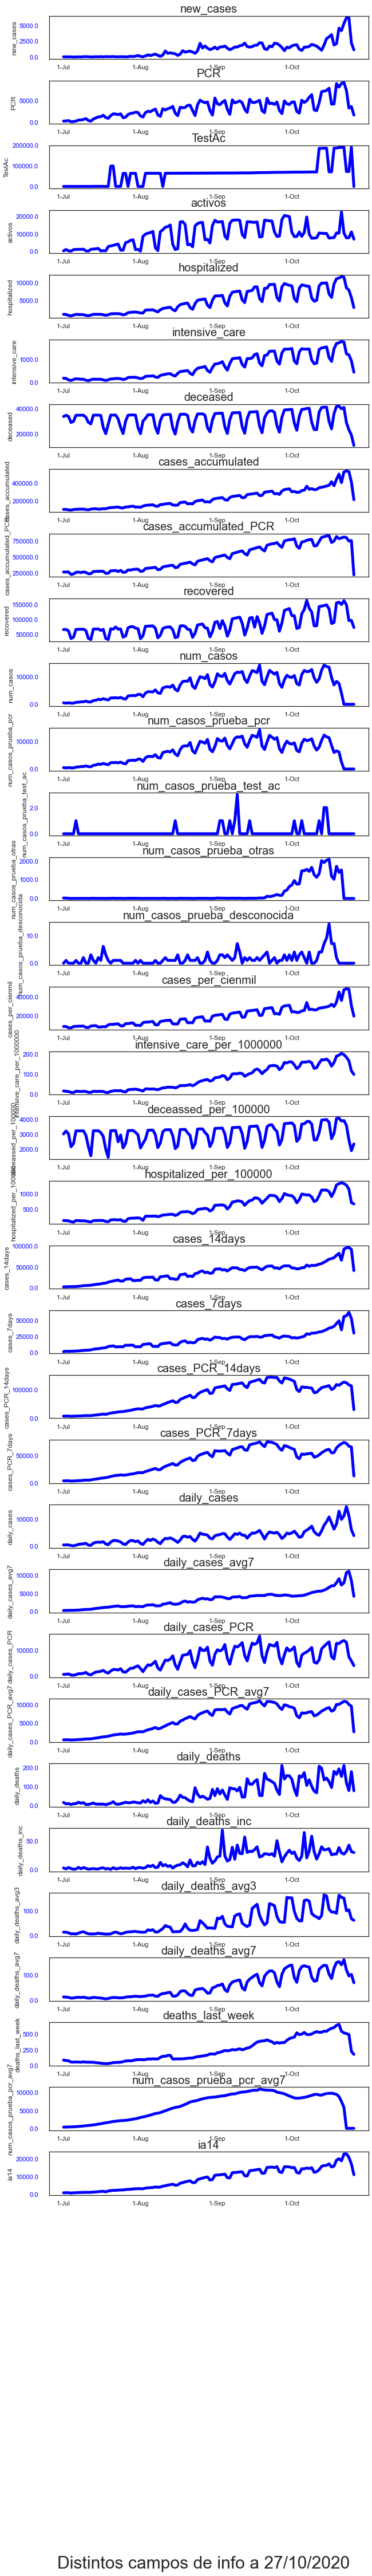

In [98]:
#un par de funciones para formatear

def format_x(value, tick_number):
        return  datetime.fromordinal(int(value)).strftime('%d-%b')

    
def format_y(value, tick_number):
        return  '{:.1f}'.format(value)
    
#preparamos los  datos: eliminamos las columnas no numéricas al no poderse representar gráficamente
#generamos un pandas 'datos'que habremos filtrado desde la fecha de los datos que queremos representrar

a_borrar=['date','poblacion','province','ine_code','ccaa','source_name','source','comments']
claves=list(df.columns)
for i in a_borrar:
    claves.remove(i) 

datos = df.fillna(0,axis=1)
datos = datos[datos['date']>=datetime(year=2020,month=7,day=1)]
    
    
#vamos a generar un gráfico matplotlib en al que añadiremos cada una de las columnas
f = plt.figure(figsize=(10,70))
f.subplots_adjust(hspace=.5, wspace=.5)
f.suptitle('Distintos campos de info a '+datetime.today().strftime('%d/%m/%Y')
           ,fontsize=30,y=0)

#sns.set_style("whitegrid")
#sns.set_palette(sns.color_palette("RdBu_r",19))

#iteramos sobre la lista de columnas y las añadimos como un eje adicional
for i,clave in enumerate(claves):
    axe=f.add_subplot(len(claves),1,i+1)
    
    data1=datos.pivot_table(index=['date'],values=[clave],aggfunc=np.sum)
    
    axe.set_title(clave,size=20)
    sns.lineplot(data1.index, data1[clave], ax=axe,color='blue',linewidth=5)
    axe.tick_params(axis='y', labelcolor='blue',size=15)
    
    axe.yaxis.set_major_formatter(plt.FuncFormatter(format_y))    
    axe.xaxis.set_major_locator(DayLocator([1]))

    majorFmt = DateFormatter('%-d-%b')
    axe.xaxis.set_major_formatter(majorFmt)
    axe.set_xlabel('')
    
#f.tight_layout()  # otherwise the right y-label is slightly clipped
#f.savefig('graficos/grafic

Una vez analizadas cada una de las columnas de datos podremos elegir las que queremos presentar..

Preparemos un gráfico tipo [Facetgrid](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html), al que añadiremos tantos gráficos como provincias, presentando una de las columnas de datos. Elegimos nº de hospitalizados por 100.000 habitantes. Dejo otras claves con `#` para que fácilmente se puedan generar. Este ejemplo esta basado en el código del link anterior.

In [99]:
sns.set(style="white",rc={"axes.facecolor": (0, 0, 0, 0)})

# Preparamos los datos. Es importante añadir un zero a los campos NotANumber..


datos = df.fillna(0,axis=1)
datos = datos.sort_values(by=['province','date'], inplace=False, ascending=True)
provincias = sorted(df['province'].unique())
datos = datos[(datos['date']>=datetime(year=2020,month=8,day=1)) & (datos['province'].isin(provincias))]


color_ratio = 'red'
color_fill = 'royalblue'
color_titulos = 'navy'
color_linea='darkred'

clave_ratio = 'tasa_ia_7_dias'
AI='ia14' #nuevo campo calculado por PAblo, es el que vamos a utilizar.

titulo = 'Incidencia Acumulada de 14 días por 100.000 hab (Azul) \n Ratio de la IA a 7 días (Rojo)'
y_IA='IA a 14 días'
y_ratio='Ratio a 7 días'
valencia=['Alicante/Alacant','Castellón/Castelló', 'Valencia/València']


for provincia in provincias:


    serie=datos.loc[datos['province']==provincia,AI].pct_change(periods=7).add(1)
    datos.loc[datos['province']==provincia,clave_ratio]=serie  
    

    


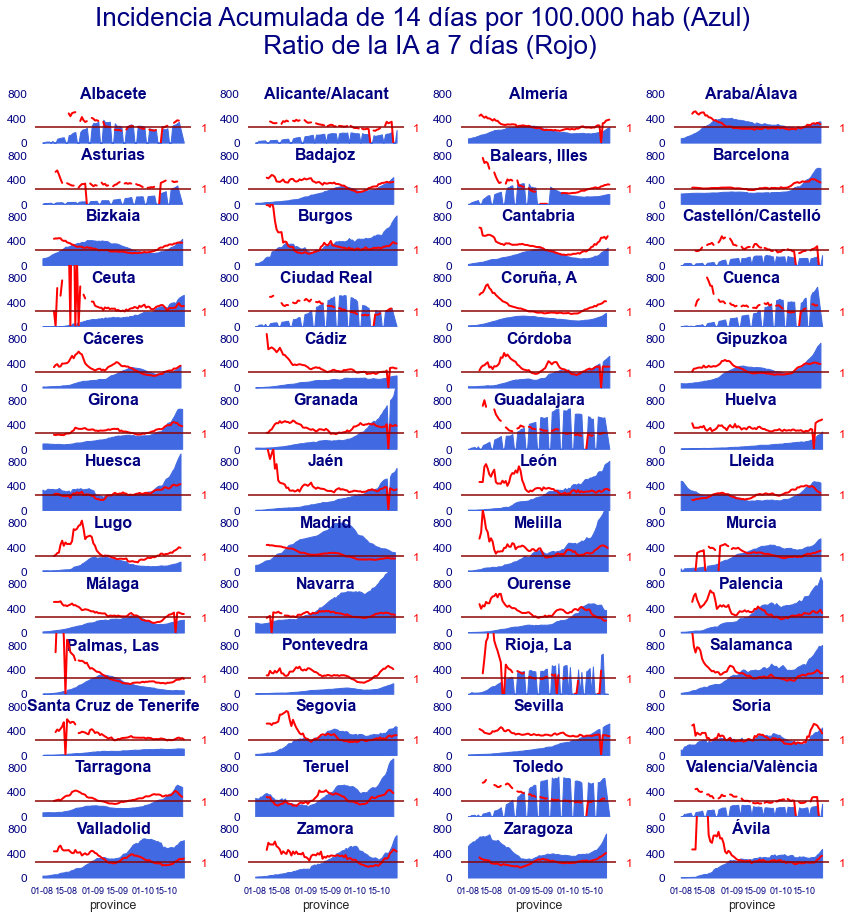

In [100]:
# Creamos la figura desde Matplotlib
#plt.figure()

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(52, rot=-.25, light=.7)
with sns.plotting_context('paper', font_scale = 1.3):
    g = sns.FacetGrid(datos,col='province', hue='province',col_wrap=4,aspect=3, 
                      margin_titles=False,height=1.0, palette=pal)
# Título



#g.fig.text(1, 0,'Fuente: {}'.format(hashtag_fuente), fontsize=10,horizontalalignment='right') #add text
#g.fig.text(1,0.01,'Código:{}'.format(github_url),
          # fontsize=10,horizontalalignment='right')
# Draw the densities in a few steps

XmajorFmt = DateFormatter('%d-%m')
def grafica(x, color, label):
    ax1 = plt.gca()
    df_datos= datos.loc[datos['province'] == label]
    #ax1.fill_between(datos['date'].unique(), datos[AI],color=color_diarios)
    ax1.text(0.5, .8, label, fontweight="bold", color=color_titulos,
            ha="center", va="center", size=16,transform=ax1.transAxes)
    ax1.fill_between(df_datos['date'].unique(), df_datos[AI],color=color_fill)
    
    
    
    ax1.set_ylim(0,1000)
    ax1.set_yticks([0,400,800])
    ax1.yaxis.set_tick_params(labelsize=12,width=0,labelcolor=color_titulos)
    ax1.yaxis.set_major_locator(plt.MaxNLocator(3))
    ax1.xaxis.set_tick_params(labelsize=9,labelcolor='navy')
    ax1.set_xticks([])
    
    ax2 = ax1.twinx()
    ax2.plot(df_datos['date'].unique(), df_datos[clave_ratio], lw=2, color=color_ratio)
    ax2.yaxis.set_tick_params(labelsize=12,width=0,labelcolor=color_ratio)
    ax2.set_ylim(0,4)
    ax2.set_yticks([1])
    ax2.xaxis.set_major_formatter(XmajorFmt)
    #ax2.xaxis.set_tick_params(labelsize=20,labelcolor='navy')
    ax2.xaxis.set_major_locator(DayLocator([1,15]))
    
    
    #x0,x1=ax2.get_xlim()
    ax2.axhline(1,color=color_linea)
g.map(grafica,'province')


# Establecemos la distancia entre gráficos verticalmente para que no haya solapes


# Quitamos los títulos, título del eje x, y todos los ticks de y
g.set_titles("")

g.despine(bottom=True, left=True)
g.fig.suptitle('{}'.format(titulo),fontsize=26,color='navy')
#g.fig.subplots_adjust(hspace=0)
g.fig.subplots_adjust(hspace=0,top=.9)
plt.savefig('graficos/pcr_provincias.png',dpi=100)  
#plt.tight_layout()
plt.show()
#plt.close()


# Gráficos de una lista específica de provincias

Y ahora preparemos gráficos más específicos por Comunidades siguiendo con el modelo `facetgrid` de `seaborn`. Veremos que en cada sección de preparación de datos filtraremos por la lista de provincias de cada comunidad.

In [101]:
def grafico_IA14_ratio(datos, campo_casos, provincias,nombre_fichero):

    clave_avg='daily_cases_PCR_avg7'
    clave_ratio_avg = 'ratio_daily_cases_PCR_avg7'
    color_avg = 'darkred'
    color_titulos = 'navy'
    color_diarios = 'royalblue'
    clave_ratio = 'tasa_ia_7_dias'
    AI='ia14'
    casos_nuevos='daily_cases'
    ventana_IA=14
    titulo = 'Incidencia Acumulada de 14 días por 100.000 hab (Azul) \n Ratio de la IA a 7 días (Rojo)'
    y_IA='IA a 14 días'
    y_ratio='Ratio a 7 días'
    n_cajas = len(provincias)
    if n_cajas<=3:
        columnas=n_cajas
    elif n_cajas==4:
        columnas = 2
    else:
        columnas = 3
    
    datos_ = datos.fillna(0,axis=1)
    datos_ = datos_[(datos_['date']>=datetime(year=2020,month=7,day=1)) & (datos_['province'].isin(provincias))]

    for provincia in provincias:
        serie=datos_.loc[datos_['province']==provincia,AI].pct_change(periods=7).add(1)
        datos_.loc[datos_['province']==provincia,clave_ratio]=serie    
    

    f = plt.figure(figsize=(10,5))

    # Initialize the FacetGrid object
    pal = sns.cubehelix_palette(52, rot=-.25, light=.7)
    g = sns.FacetGrid(datos_,col='province', hue='province', margin_titles=False, col_wrap=columnas,aspect=1.5, 
                  height=5, palette=pal)
    # Título
    #g.fig.set_figwidth(20)
    #g.fig.set_figheight(10)
    #g.fig.suptitle(titulo,fontsize=30,color=color_titulos)
    #g.fig.text(0.1, 0.04, 'Fuente:{}'.format(path_montera34[:-9]), horizontalalignment='left',verticalalignment='center', 
    #       fontsize=24,color=color_titulos)

    #g.fig.text(0.1,0.01,'Código:{}'.format(github_url),
    #           fontsize=24,horizontalalignment='left',color=color_titulos)
    XmajorFmt = DateFormatter('%d-%b')

    def grafica(x, color, label):
        ax1 = plt.gca()
        df_datos= datos_.loc[datos_['province'] == label]
        #ax1.fill_between(datos['date'].unique(), datos[AI],color=color_diarios)
        ax1.text(0.5, .9, label, fontweight="bold", color=color_titulos,
                ha="center", va="center", size=16,transform=ax1.transAxes)
        ax1.fill_between(df_datos['date'].unique(), df_datos[AI],color=color_fill)
    
    
    
        ax1.set_ylim(0,1000)
        ax1.set_yticks([0,400,800])
        ax1.yaxis.set_tick_params(labelsize=12,width=0,labelcolor=color_titulos)
        ax1.yaxis.set_major_locator(plt.MaxNLocator(3))
        ax1.xaxis.set_tick_params(labelsize=9,labelcolor='navy')
        ax1.set_xticks([])
        ax1.grid(True,axis='y',which='both')
        
        ax2 = ax1.twinx()
        ax2.plot(df_datos['date'].unique(), df_datos[clave_ratio], lw=2, color=color_ratio)
        ax2.yaxis.set_tick_params(labelsize=12,width=0,labelcolor=color_ratio)
        ax2.set_ylim(0,4)
        ax2.set_yticks([1])
        ax2.xaxis.set_major_formatter(XmajorFmt)
        #ax2.xaxis.set_tick_params(labelsize=20,labelcolor='navy')
        ax2.xaxis.set_major_locator(DayLocator([1,15]))
        #ax2.grid(True,axis='both',which='both')
    
        #x0,x1=ax2.get_xlim()
        ax2.axhline(1,color=color_linea)
    
    g.map(grafica,'province')
    


    g.set_titles('')
    # Establecemos la distancia entre gráficos verticalmente para que no haya solapes
    #g.fig.subplots_adjust(hspace=0.1,wspace=.1)
    g.fig.suptitle('{}'.format(titulo),fontsize=26,color='navy')
    g.fig.subplots_adjust(top=.8)
    #plt.tight_layout(w_pad=1,h_pad=5,pad=5)
    g.despine(bottom=True, left=True)
    plt.savefig('graficos/'+nombre_fichero+'.png',dpi=100)  
    plt.show()
    return

<Figure size 720x360 with 0 Axes>

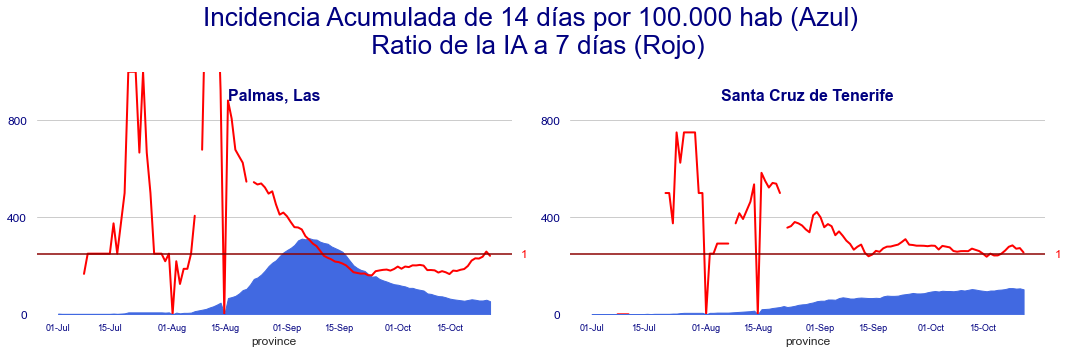

In [102]:
grafico_IA14_ratio(df,campos,['Palmas, Las', 'Santa Cruz de Tenerife'],'canarias')

<Figure size 720x360 with 0 Axes>

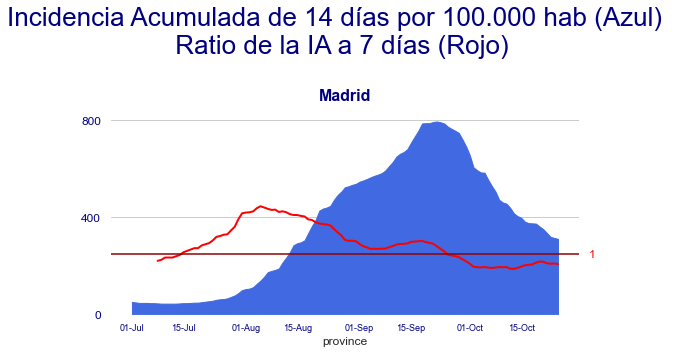

In [103]:
grafico_IA14_ratio(df,campos,['Madrid'],'madrid')

<Figure size 720x360 with 0 Axes>

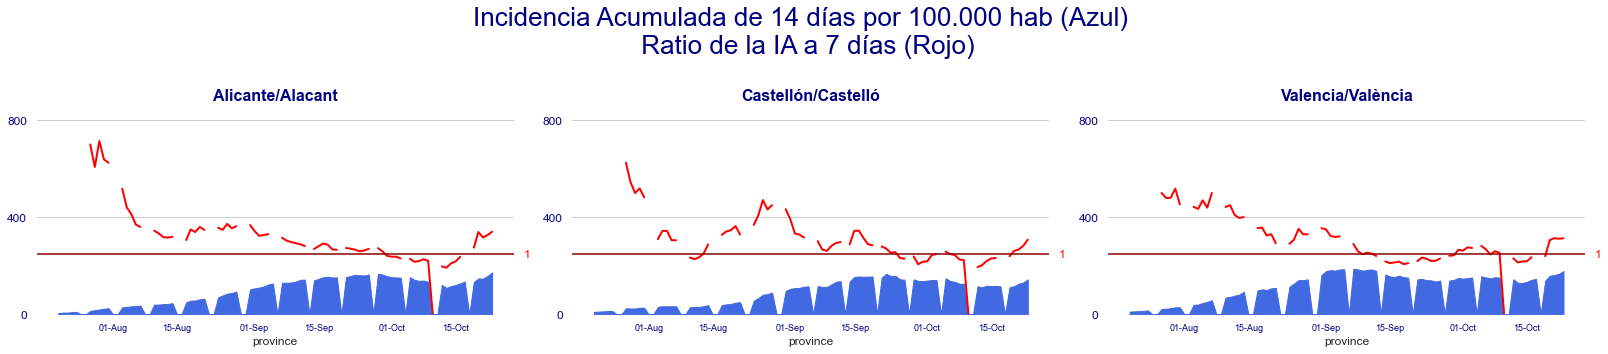

In [46]:
grafico_IA14_ratio(datos,campos,['Alicante/Alacant','Castellón/Castelló', 'Valencia/València'],'valencia')

<Figure size 720x360 with 0 Axes>

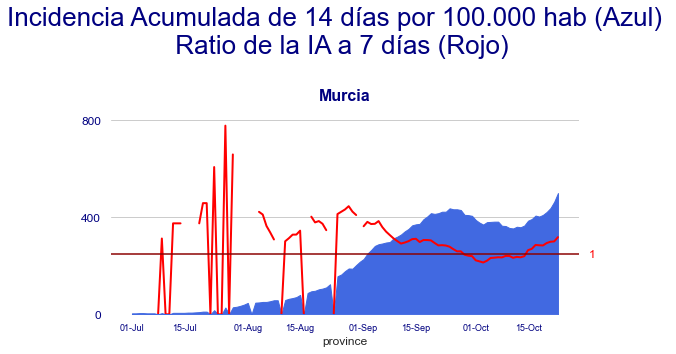

In [48]:
grafico_IA14_ratio(df,campos,['Murcia'],'murcia')

<Figure size 720x360 with 0 Axes>

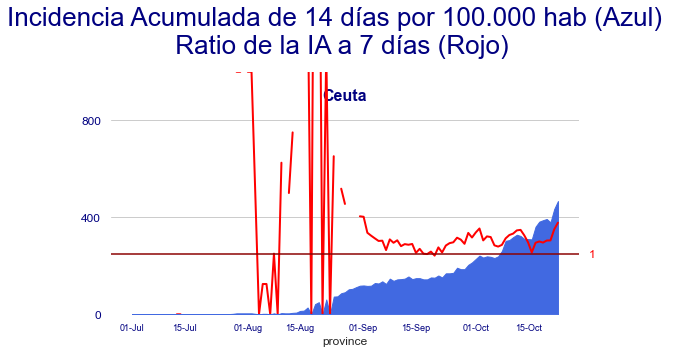

In [50]:
grafico_IA14_ratio(df,campos,['Ceuta'],'ceuta')

<Figure size 720x360 with 0 Axes>

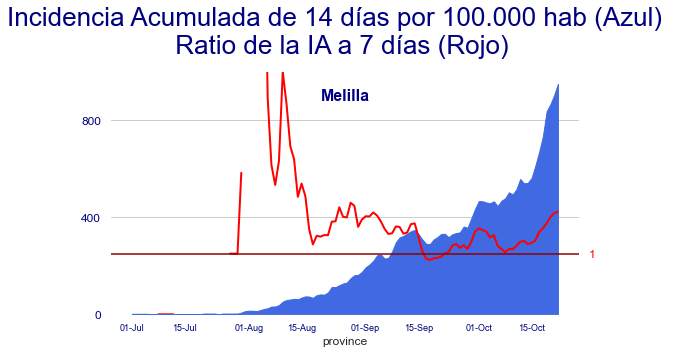

In [51]:
grafico_IA14_ratio(df,campos,['Melilla'],'melilla')

<Figure size 720x360 with 0 Axes>

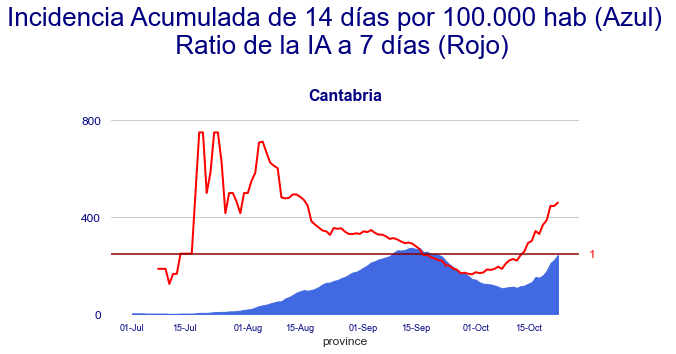

In [52]:
grafico_IA14_ratio(df,campos,['Cantabria'],'cantabria')

<Figure size 720x360 with 0 Axes>

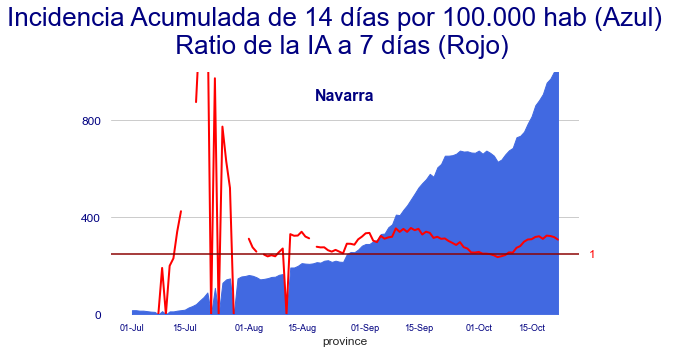

In [84]:
grafico_IA14_ratio(df,campos,['Navarra'],'navarra')

<Figure size 720x360 with 0 Axes>

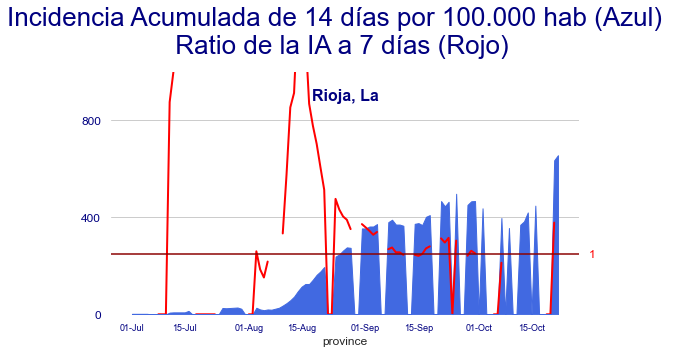

In [54]:
grafico_IA14_ratio(df,campos,['Rioja, La'],'rioja')

<Figure size 720x360 with 0 Axes>

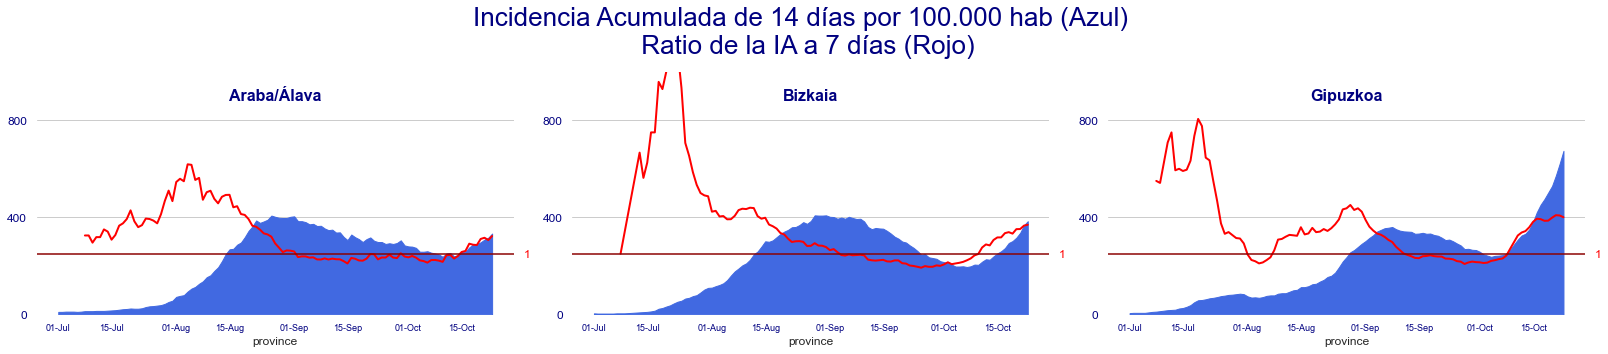

In [55]:
grafico_IA14_ratio(df,campos,['Bizkaia','Araba/Álava','Gipuzkoa'],'paisvasco')

<Figure size 720x360 with 0 Axes>

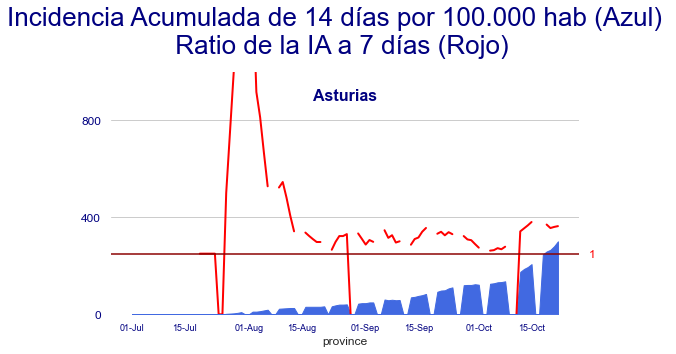

In [56]:
grafico_IA14_ratio(df,campos,['Asturias'],'asturias')

<Figure size 720x360 with 0 Axes>

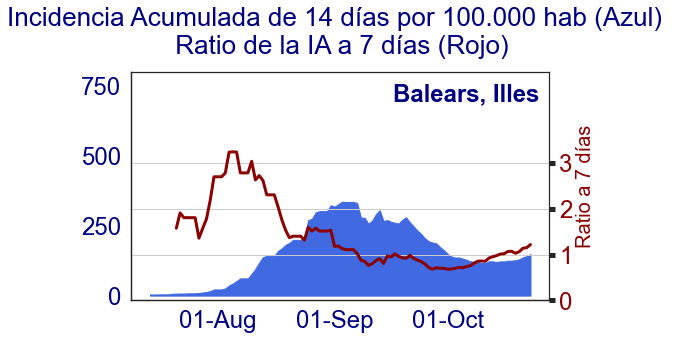

In [32]:
grafico_IA14_ratio(df,campos,['Balears, Illes'],'baleares')

<Figure size 720x360 with 0 Axes>

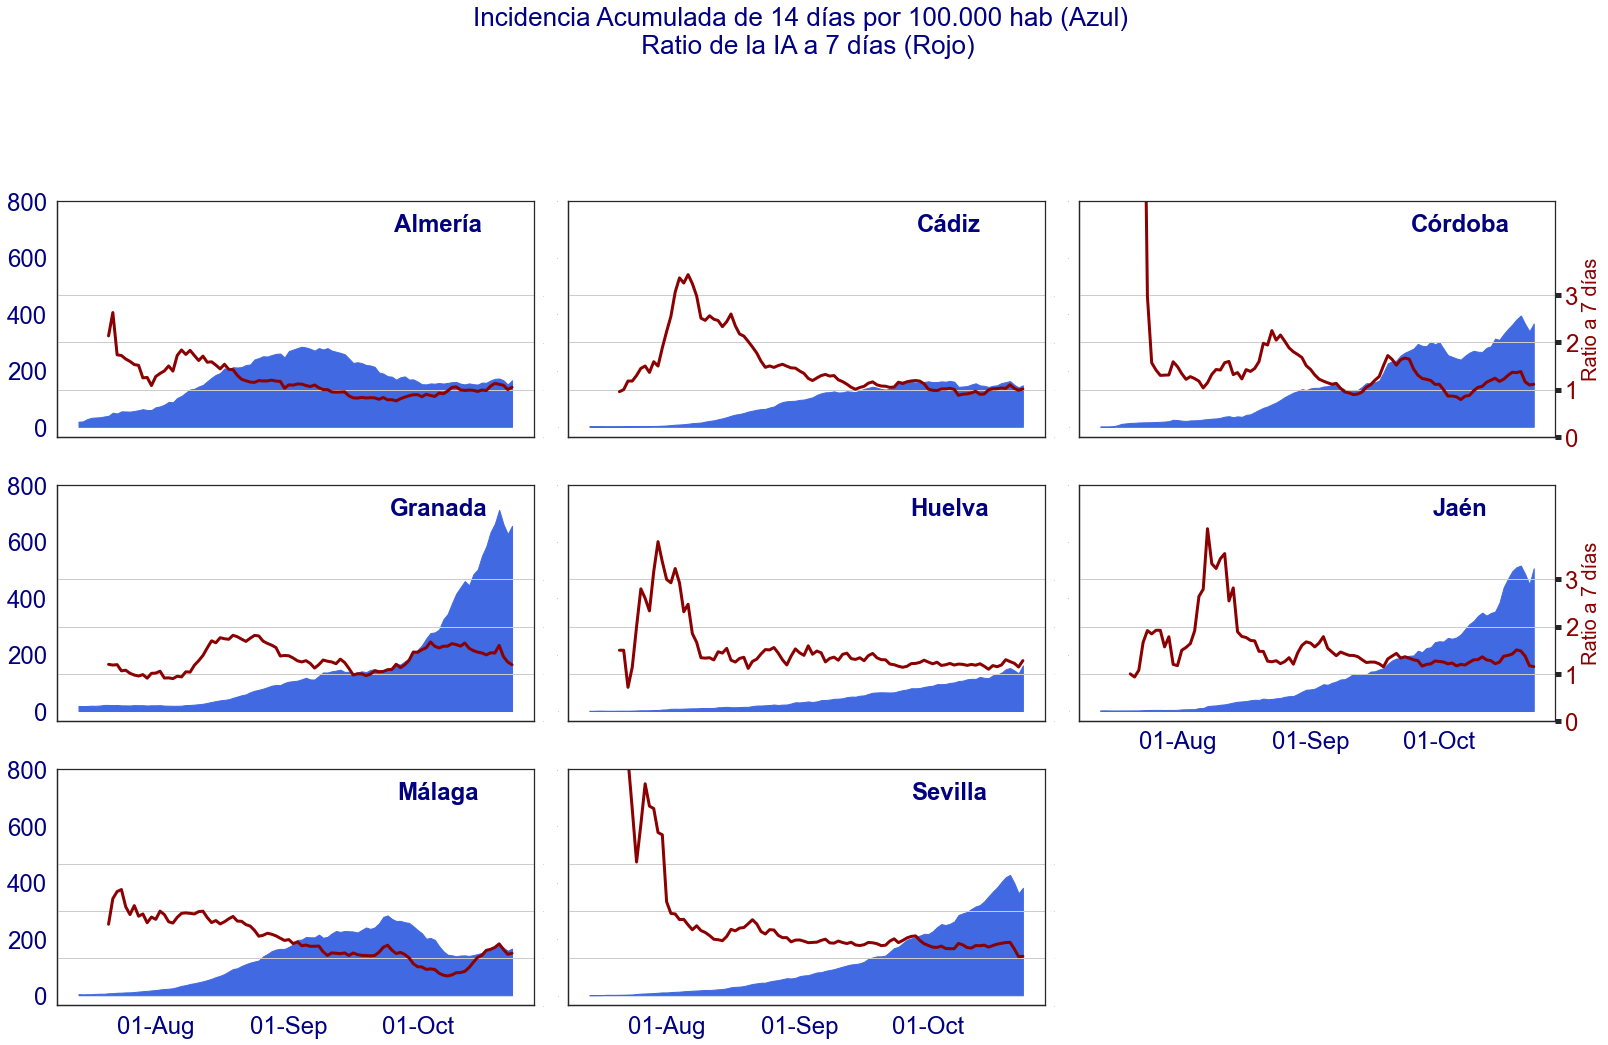

In [33]:
grafico_IA14_ratio(df,campos,['Almería','Cádiz','Córdoba','Granada','Huelva','Jaén','Málaga','Sevilla'])

<Figure size 720x360 with 0 Axes>

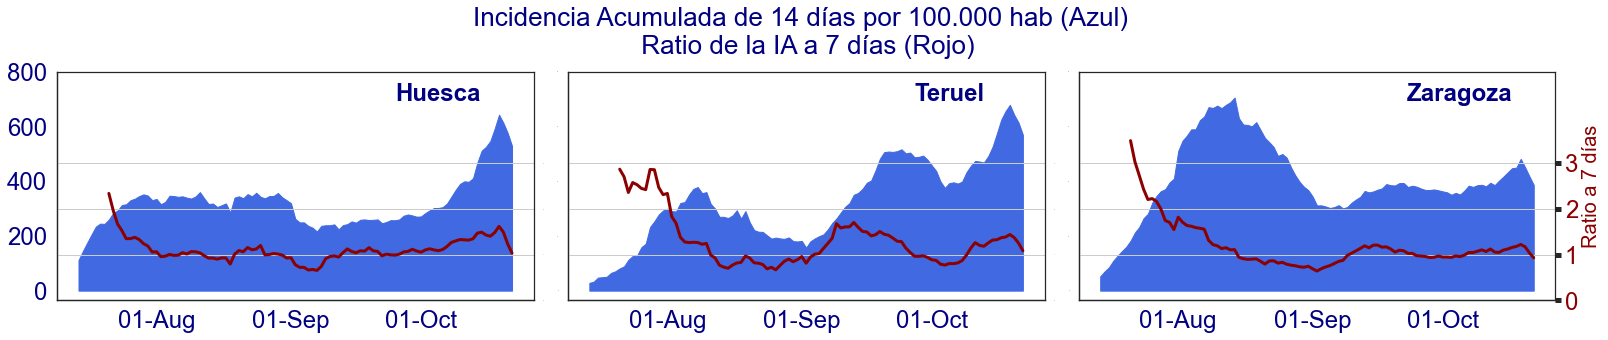

In [34]:
grafico_IA14_ratio(df,campos,['Huesca','Teruel','Zaragoza'])

<Figure size 720x360 with 0 Axes>

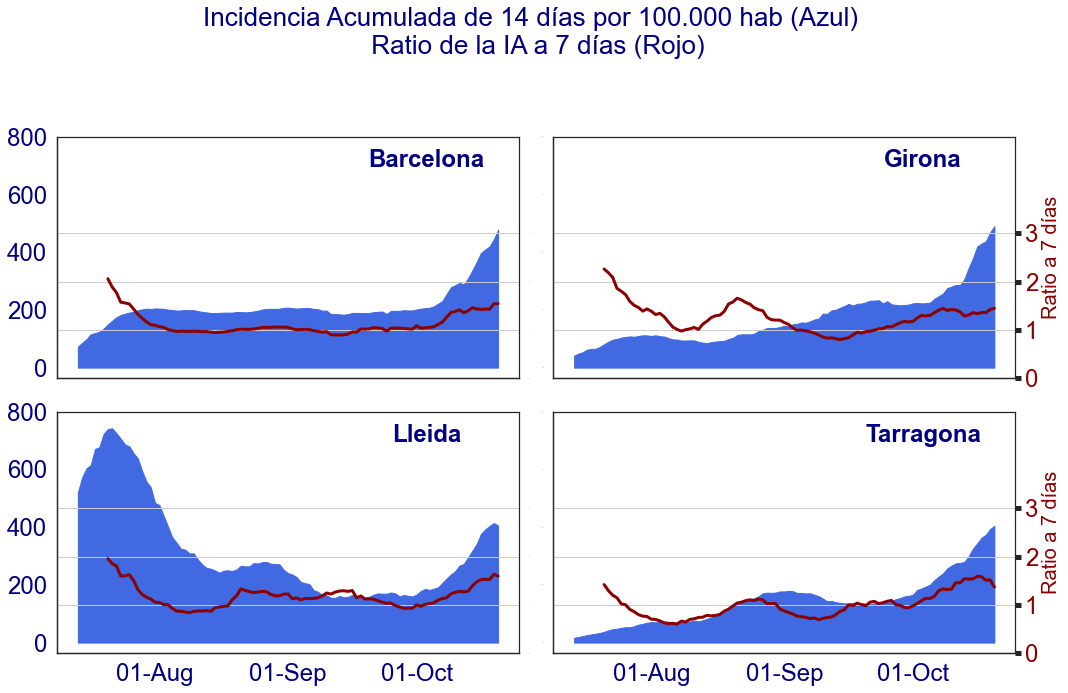

In [35]:
grafico_IA14_ratio(df,campos,['Barcelona','Tarragona','Girona','Lleida'])

<Figure size 720x360 with 0 Axes>

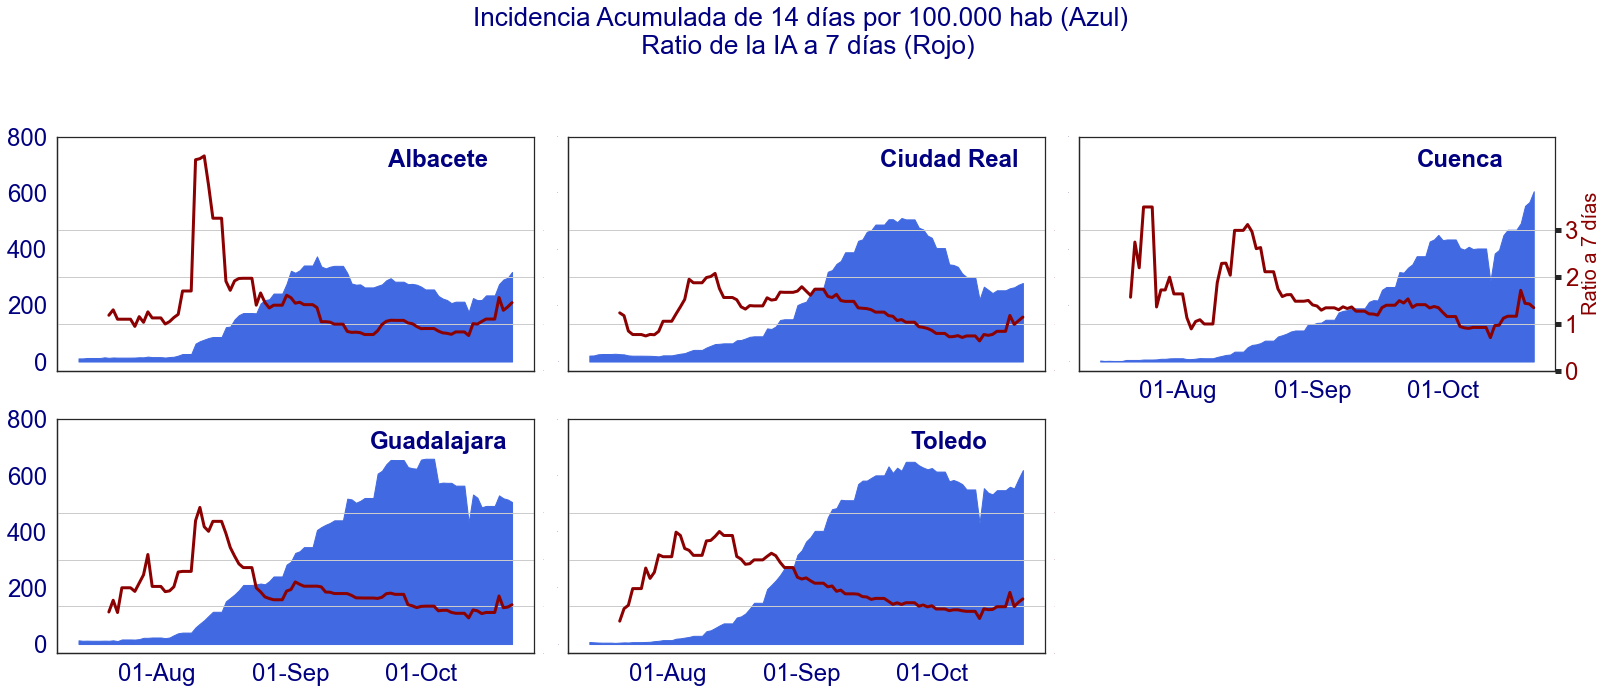

In [36]:
grafico_IA14_ratio(df,campos,['Albacete','Ciudad Real','Cuenca','Guadalajara','Toledo'])

<Figure size 720x360 with 0 Axes>

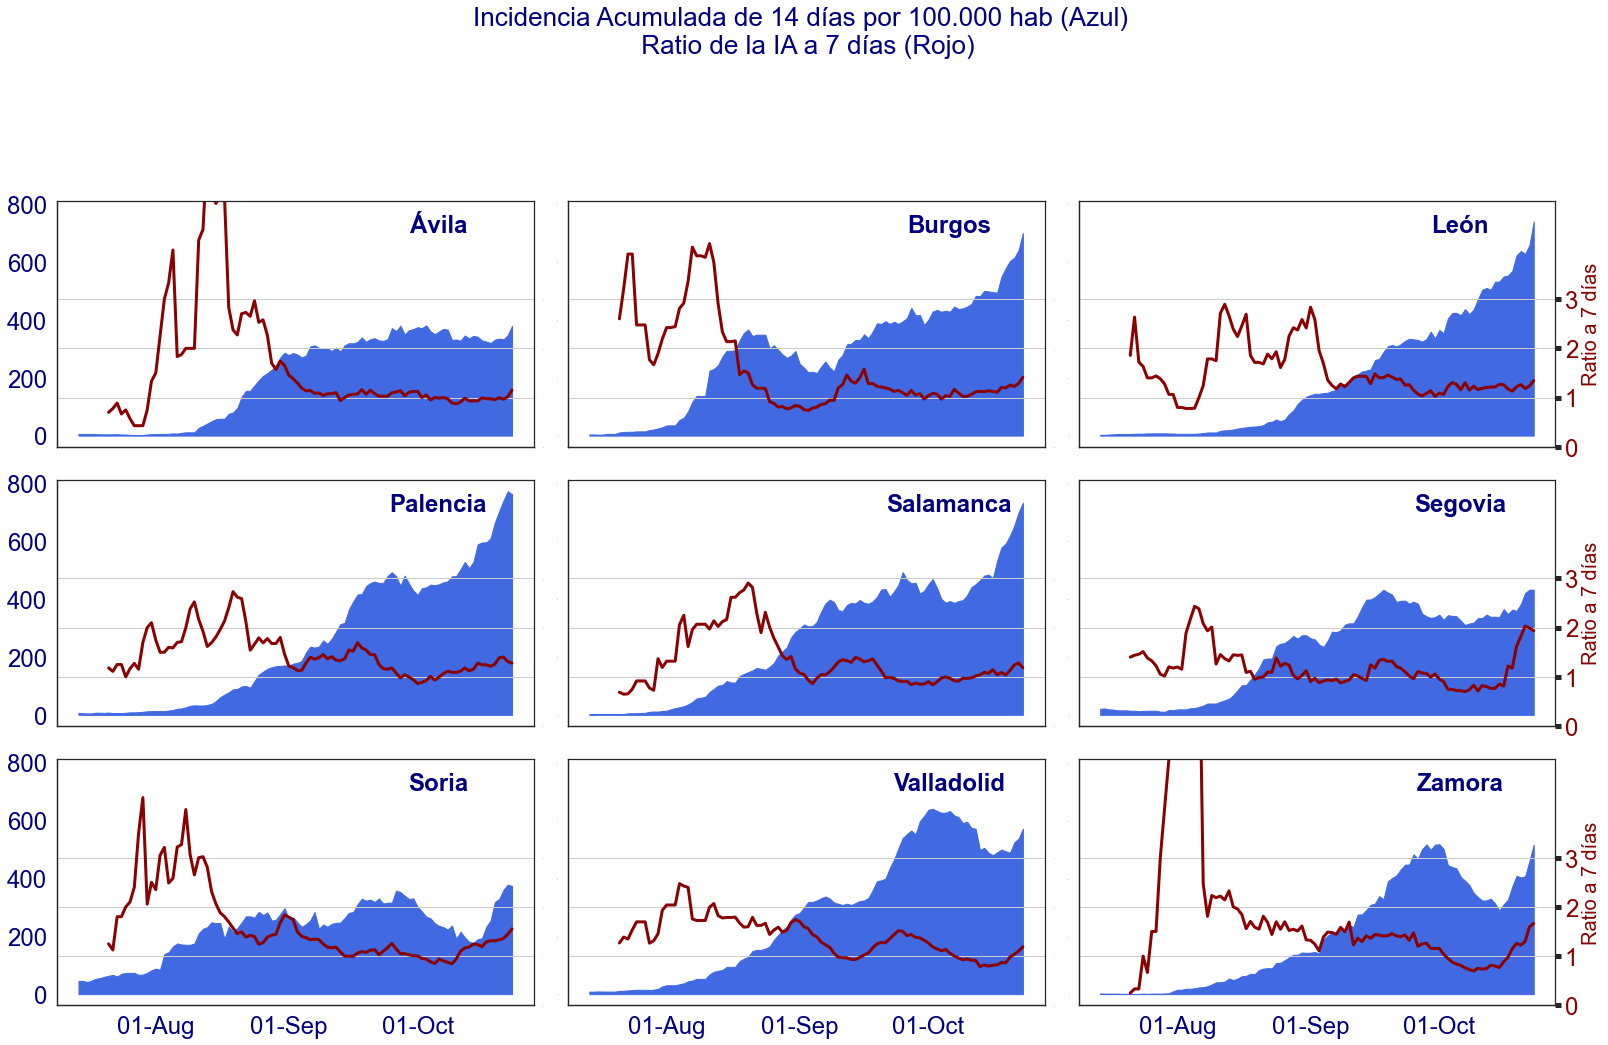

In [37]:
grafico_IA14_ratio(df,campos,['Ávila','Burgos','León','Palencia','Segovia','Soria','Salamanca','Valladolid','Zamora'])

<Figure size 720x360 with 0 Axes>

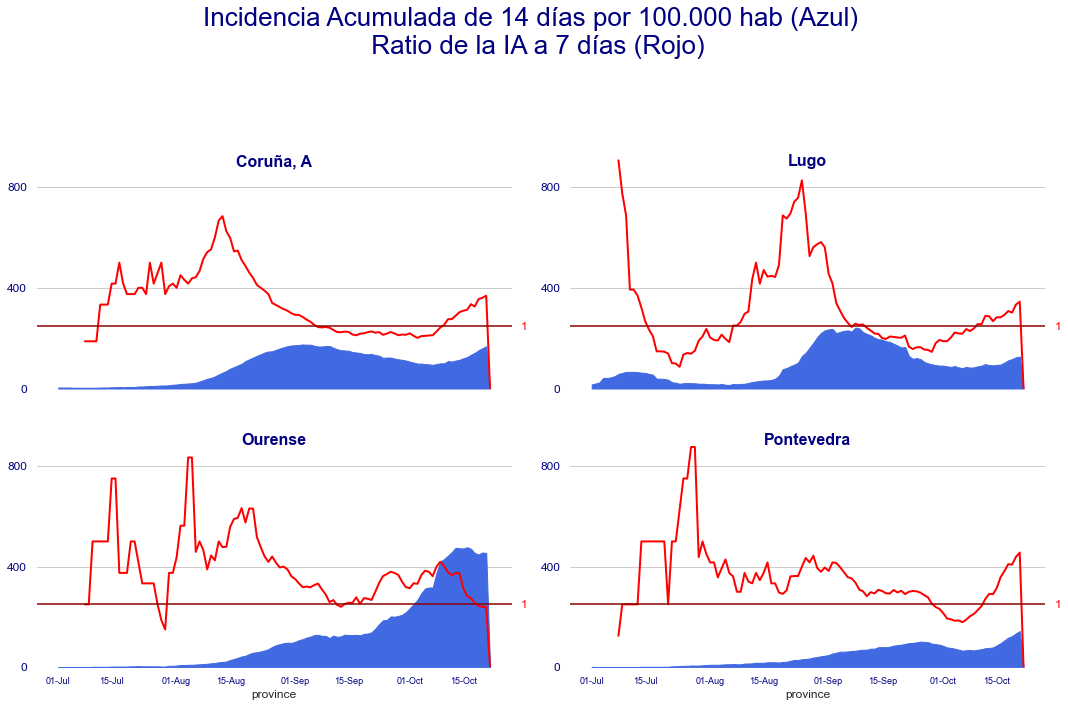

In [83]:
grafico_IA14_ratio(df,campos,['Coruña, A','Lugo','Ourense','Pontevedra'],'galicia')

<Figure size 720x360 with 0 Axes>

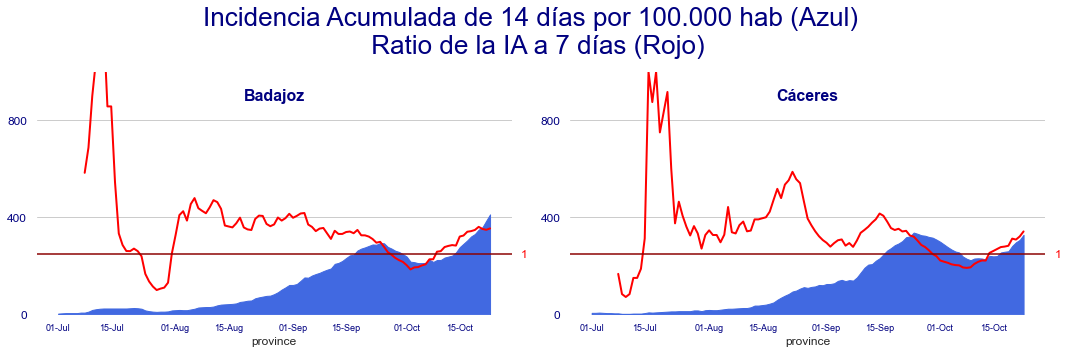

In [81]:
grafico_IA14_ratio(df,campos,['Badajoz','Cáceres'],'extremadura')